# Sentiments Analysis

## 1. Introduction



## 2. Getting Started

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Setting the path
import os
os.chdir("C:/Users/datal/Desktop/New")

In [4]:
# Importing the dataset
Train = pd.read_csv("./Input/train_F3WbcTw.csv")
Test = pd.read_csv("./Input/test_tOlRoBf.csv")
Sample_submission = pd.read_csv("./Input/sample_submission_i5xnIZD.csv")

## 2. Understanding the data

In [5]:
# Shape of data
print("Number of rows and columns in train dataset:",Train.shape)
print("Number of rows and columns in test dataset:",Test.shape)

Number of rows and columns in train dataset: (5279, 4)
Number of rows and columns in test dataset: (2924, 3)


In [6]:
# Variable structure
print("-----------------Variable Structure of training data--------------")
Train.info()
print("-----------------Variable Structure of test data------------------")
Test.info()

-----------------Variable Structure of training data--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 4 columns):
unique_hash    5279 non-null object
text           5279 non-null object
drug           5279 non-null object
sentiment      5279 non-null int64
dtypes: int64(1), object(3)
memory usage: 165.0+ KB
-----------------Variable Structure of test data------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 3 columns):
unique_hash    2924 non-null object
text           2924 non-null object
drug           2924 non-null object
dtypes: object(3)
memory usage: 68.6+ KB


 
> No missing value has been observed in this data.

Let's reconfirm missing value in another step as well.

In [7]:
print("Missing value in Train data:", Train.isnull().sum().sum())
print("Missing value in Test data:", Test.isnull().sum().sum())

Missing value in Train data: 0
Missing value in Test data: 0


> It got confirmed that this dataset does not contain any missing value.

Let's look at top 5 rows of train dataset:

In [8]:
# Top 5 rows
Train.head(5)

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


Now, let's look at distribution of label:

In [9]:
# Checking distribution of Product_Category
print("The unique number of Product Categories: ",len(Train['sentiment'].unique()))
print("Below are the distribution of each categories in Train data:")
Train['sentiment'].value_counts(normalize = True)

The unique number of Product Categories:  3
Below are the distribution of each categories in Train data:


2    0.724569
1    0.158553
0    0.116878
Name: sentiment, dtype: float64

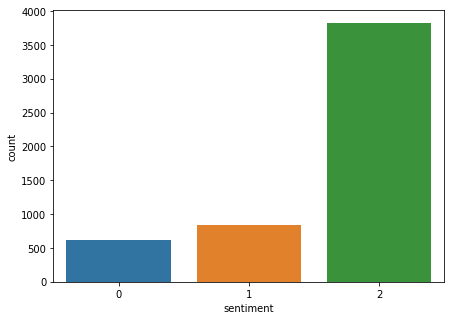

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'sentiment', data = Train);

> It is clearly visible from above analysis that we are dealing with **unbalanced classification** problem.

In [11]:
Train['pre_clean_len'] = [len(t) for t in Train.text]
Train.head(5)

,unique_hash,text,drug,sentiment,pre_clean_len
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,404
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,1184
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,780
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,124
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,612


In [12]:
Train['pre_clean_len'].describe()

count      5279.000000
mean       2075.701080
std        5075.540253
min           6.000000
25%         419.000000
50%         807.000000
75%        1706.000000
max      127948.000000
Name: pre_clean_len, dtype: float64

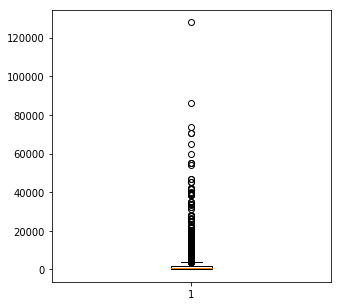

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(Train.pre_clean_len)
plt.show()

## 3. Data Preprocessing

Let's preprocess our data for building classification model. As we already discussed above that our main variable of interest is **text and drug**. On this variable, we are going to apply various NLP techniques.

## Defining data cleaning function

In [14]:
from string import punctuation
from os import listdir
from pickle import dump
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# turn a doc into clean tokens
# Creating function for preprocessing
def clean_and_tokenize_tweets(data):
    # Making lowercase
    data['text_new'] = data['text'].str.lower()
  
    # remove special characters, numbers, punctuations
    data['text_new'] = data['text_new'].str.replace("[^a-zA-Z]", " ")
  
    # removing short words
    data['text_new'] = data['text_new'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 1]))
  
    # removing stop words
    stop = set(stopwords.words("english"))                  
    data['text_new'] = data['text_new'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  
    # Tokenize the words for it to use
    tokenized_tweet = data['text_new'].apply(lambda x: x.split())
  
    # Lemmatization
    nltk.download('wordnet')
    from nltk.stem.wordnet import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
  
    # Stiching back together
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
    data['text_new'] = tokenized_tweet
    return data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\datal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# load all training reviews
# Applying Preprocessing function on Training data
Train_data = clean_and_tokenize_tweets(Train)
Train_data.head(5)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\datal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,unique_hash,text,drug,sentiment,pre_clean_len,text_new
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,404,autoimmune disease tend come cluster gilenya f...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,1184,completely understand want try result reported...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,780,interesting target receptor rather like fingol...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,124,interesting grand merci wonder lemtrada ocrevu...
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,612,hi everybody latest mri result brain cervical ...


In [16]:
# Applying Preprocessing function on Test data
Test_data = clean_and_tokenize_tweets(Test)
Test_data.head(5)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\datal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,unique_hash,text,drug,text_new
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod,previously stable natalizumab switching fingol...
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod,fingolimod since december way describe better ...
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira,apparently shingle red spot left breast appear...
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso,docetaxel week week week claim le harsh effica...
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara,cc stelara worked matter day gi willing jump h...


## 4. DNN Model

In this section, we will develop a multichannel convolutional neural network for the sentiment analysis prediction problem.

This section is divided into 3 parts:

 + Encode Data
 + Define Model

In [17]:
# Creating X and y
X = Train_data.text_new
y = Train_data.sentiment
test_data = Test_data.text_new

import keras.utils.np_utils as ku

y = ku.to_categorical(y)

Using TensorFlow backend.


In [18]:
from sklearn.model_selection import train_test_split

validation_percent = 0.20
test_percent = 0.50
seed = 786

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = validation_percent, random_state = seed, stratify = y)

# Shape of data
print("Number of rows and columns in train dataset:",X_train.shape)
print("Number of rows and columns in test dataset:",X_test.shape)

print("Number of rows and columns in target variable for training:",y_train.shape)
print("Number of rows and columns in target variable for test:",y_test.shape)

Number of rows and columns in train dataset: (4223,)
Number of rows and columns in test dataset: (1056,)
Number of rows and columns in target variable for training: (4223, 3)
Number of rows and columns in target variable for test: (1056, 3)


### 4.1 RNN

In [19]:
from keras import layers
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, SimpleRNN, LSTM, GRU, Bidirectional
from keras import regularizers
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import numpy.random as nr

%matplotlib inline

In [20]:
from keras.preprocessing.text import Tokenizer

print(X_train[2])

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

test_data = tokenizer.texts_to_sequences(test_data)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train[2])


interesting target receptor rather like fingolimod hoping soon see aes saes yes sure mean exactly quote nine patient reported serious adverse event mg mg mg mg serious adverse event reported patient new safety signal occurred compared bold study patient reporting saes stated serious adverse event reported patient maybe read right maybe misprint pleased something developed spms encouraging siponimod linger long body
[698, 23, 109, 1739, 364, 11, 23, 271, 23, 163, 640, 8, 265, 5, 4136, 607, 698, 11, 902, 28, 1739, 265, 660, 419, 91, 463, 26, 114, 5, 561, 145, 425, 561, 3027, 151, 1885, 76, 240, 36, 91, 3203, 654, 163, 640, 8, 168, 35, 163, 640, 2076, 8, 34, 545, 8, 1667, 105, 265, 104, 26, 34, 545, 2076, 8, 215, 4286, 1019, 44, 4032, 697, 989, 328, 44, 38, 104, 384, 100, 2831, 4286, 1019, 40, 1019, 2977, 28, 424, 51, 3204, 817, 62, 96, 3139, 3481, 1148, 1044, 4397, 481, 3205, 1365, 2832, 2832, 76, 100, 1635, 1861, 1446, 3028, 420, 1078, 752, 1668, 1167, 943, 3821, 2152, 2274, 1635, 2786,

In [21]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
test_data = pad_sequences(test_data, padding='post', maxlen=maxlen)

print(X_train[0, :])

[ 799 1200  901 1060 1575  458   73   36 1459   39    6   27  276  151
    4  167  182  153 3730  988   84  989  441 1775  279  156   58    5
    3  915  258 1972    5   37   81 3138  265  189    5 1460 4670  265
  198   37   81 3480 1224  482  115   81  168   81   52  143  521    8
  864   10   49  146  169  308  226 1775  279  697  521  143  697  521
  697  521  186  423  145  186  247    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [22]:
from keras.models import Sequential
from keras import layers

embedding_dim = 100

Embedding = Sequential()
Embedding.add(layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim, input_length=maxlen))
Embedding.add(layers.Flatten())
Embedding.add(layers.Dense(10, activation='relu'))
Embedding.add(layers.Dense(3, activation='sigmoid'))
Embedding.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
Embedding.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          2959400   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                100010    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 3,059,443
Trainable params: 3,059,443
Non-trainable params: 0
_________________________________________________________________


In [23]:
Embedding.fit(X_train, y_train,epochs=20,validation_data=(X_test, y_test),batch_size=30)
loss, accuracy = Embedding.evaluate(X_train, y_train)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = Embedding.evaluate(X_test, y_test)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Instructions for updating:
Use tf.cast instead.
Train on 4223 samples, validate on 1056 samples
Epoch 1/20
4223/4223 [==============================] - 7s 2ms/step - loss: 0.4935 - acc: 0.8029 - val_loss: 0.4511 - val_acc: 0.8163
Epoch 2/20
4223/4223 [==============================] - 6s 1ms/step - loss: 0.3970 - acc: 0.8249 - val_loss: 0.4339 - val_acc: 0.8188
Epoch 3/20
4223/4223 [==============================] - 6s 1ms/step - loss: 0.2325 - acc: 0.9136 - val_loss: 0.4703 - val_acc: 0.8176
Epoch 4/20
4223/4223 [==============================] - 6s 1ms/step - loss: 0.0807 - acc: 0.9795 - val_loss: 0.5449 - val_acc: 0.8188
Epoch 5/20
4223/4223 [==============================] - 6s 1ms/step - loss: 0.0339 - acc: 0.9942 - val_loss: 0.6286 - val_acc: 0.8194
Epoch 6/20
4223/4223 [==============================] - 6s 1ms/step - loss: 0.0197 - acc: 0.9971 - val_loss: 0.6520 - val_acc: 0.8179
Epoch 7/20
4223/4223 [==============================] - 6s 1ms/step - loss: 0.0136 - acc: 0.9974 - v

In [24]:
pred = Embedding.predict(test_data)
sentiment = np.argmax(pred,axis=1)
columns=["sentiment_0", "sentiment_1", "sentiment_2"]
#columns should be the same order of y_col
results=pd.DataFrame(pred, columns=columns)
results["unique_hash"]=Test_data.unique_hash
ordered_cols=["unique_hash"]+columns
results=results[ordered_cols]#To get the same column order
results['sentiment'] = sentiment

results.head()

,unique_hash,sentiment_0,sentiment_1,sentiment_2,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,7.708371e-04,0.018446,0.962768,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,3.503853e-02,0.130946,0.113289,1
2,50b6d851bcff4f35afe354937949e9948975adf7,8.940697e-08,0.000011,0.999992,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,1.490116e-07,0.000000,1.000000,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,5.960464e-08,0.000000,1.000000,2


In [25]:
Submission = results[['unique_hash', 'sentiment']]
Submission.head()
Submission.to_csv('./Output/Output_DNN_v1.csv',index=False)